<a href="https://colab.research.google.com/github/IamAtreus/00-Tensorflow/blob/main/01_tensorflow_NN_regressionwithtf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NN regression with *TF*

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


print("TF version : ", tf.__version__)
print(tf.config.list_physical_devices('GPU'))
!nvidia-smi


TF version :  2.9.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Thu Nov 10 13:18:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
 

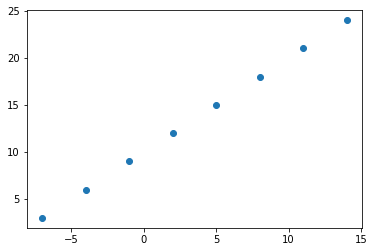

In [3]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [38]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [39]:
# turn array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

### Input and output shapes

In [4]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [26]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  
  tf.keras.layers.Dense(1)
  
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for "mean absolute error"
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for "stochastic gradient descent"
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000)

# check out X, y. predict most be 27
X, y
y_pred = model.predict([17.0])
y_pred

In [ ]:
#check out X, y. predict most be 27
X, y 
y_pred = model.predict([17.0]) 
y_pred

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  
  #tf.keras.layers.Dense(100, activation="relu"),
  #tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
  
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for "mean absolute error"
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
model.summary()

In [71]:
#check out X, y. predict most be 27
X, y 
y_pred = model.predict([17.0]) 
y_pred

1/1 [==============================] - 0s 50ms/step


array([[20.415628]], dtype=float32)

In [72]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [73]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [65]:
len(X)

50

In [74]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

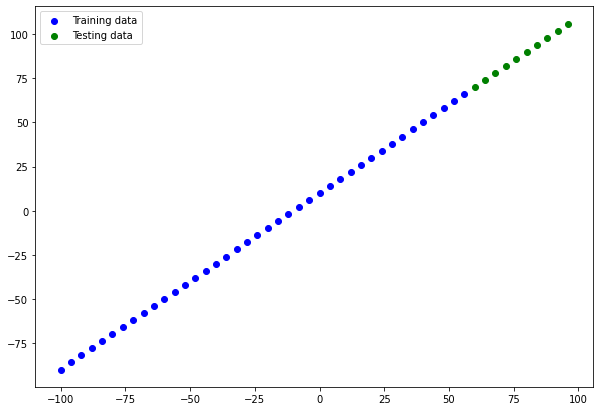

In [75]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [80]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=1000)
model.summary()

Epoch 1/1000
2/2 [==============================] - 0s 7ms/step - loss: 41.2123 - mae: 41.2123
Epoch 2/1000
2/2 [==============================] - 0s 6ms/step - loss: 40.1715 - mae: 40.1715
Epoch 3/1000
2/2 [==============================] - 0s 6ms/step - loss: 39.1841 - mae: 39.1841
Epoch 4/1000
2/2 [==============================] - 0s 5ms/step - loss: 38.1776 - mae: 38.1776
Epoch 5/1000
2/2 [==============================] - 0s 5ms/step - loss: 37.1992 - mae: 37.1992
Epoch 6/1000
2/2 [==============================] - 0s 6ms/step - loss: 36.2251 - mae: 36.2251
Epoch 7/1000
2/2 [==============================] - 0s 5ms/step - loss: 35.2339 - mae: 35.2339
Epoch 8/1000
2/2 [==============================] - 0s 6ms/step - loss: 34.2045 - mae: 34.2045
Epoch 9/1000
2/2 [==============================] - 0s 5ms/step - loss: 33.2354 - mae: 33.2354
Epoch 10/1000
2/2 [==============================] - 0s 5ms/step - loss: 32.2696 - mae: 32.2696
Epoch 11/1000
2/2 [==============================

In [81]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 43ms/step


array([[ 70.06409 ],
       [ 74.07007 ],
       [ 78.07605 ],
       [ 82.08203 ],
       [ 86.08802 ],
       [ 90.093994],
       [ 94.09998 ],
       [ 98.105965],
       [102.11195 ],
       [106.117935]], dtype=float32)